/Users/karthikmittal/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


This is a global map of the US zika outbreaks.


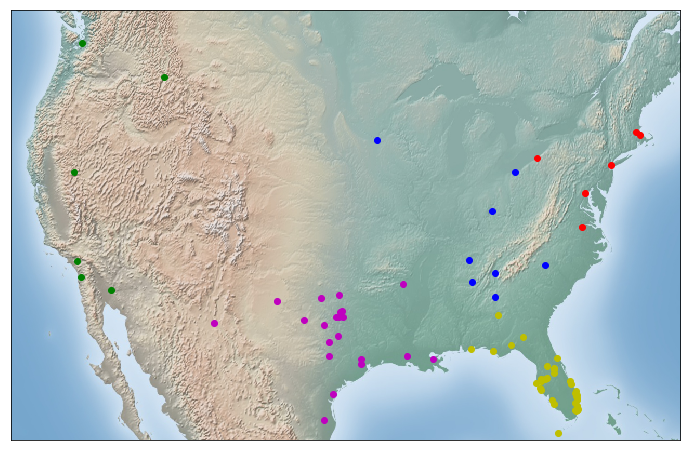

This is a global map of the world zika outbreaks.


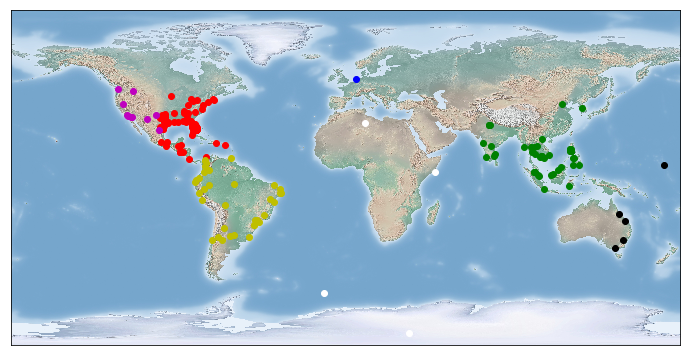

This is a global map of the US hepatitis outbreaks.


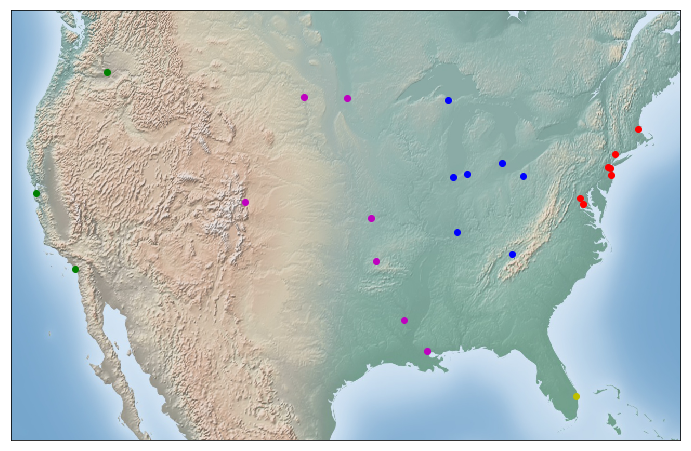

This is a global map of the world hepatitis outbreaks.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from mpl_toolkits.basemap import Basemap
from sklearn.cluster import DBSCAN
from math import radians, cos, sin, asin, sqrt
from collections import OrderedDict

#Creating the necessary dataframes in order to continue with this step
df_world = pd.read_csv('FindingGeographicLocation.csv')
del df_world['Unnamed: 0']

dict_us = {'headline': [], 'cities': [], 'latitude': [], 'longitude': [], 'countrycodes': []}
dict_other = {'headline': [], 'cities': [], 'latitude': [], 'longitude': [], 'countrycodes': []}
dict_no_us = {'latitude': [], 'longitude': []}
dict_no_other = {'latitude': [], 'longitude': []}
dict_no_world = {'latitude': [], 'longitude': []}

for index in df_world.index:
    if (df_world['countrycodes'][index] == "US"):
        dict_us['headline'].append(df_world['headline'][index])
        dict_us['cities'].append(df_world['cities'][index])
        dict_us['longitude'].append(df_world['longitude'][index])
        dict_us['latitude'].append(df_world['latitude'][index])
        dict_us['countrycodes'].append(df_world['countrycodes'][index])
        dict_no_us['longitude'].append(df_world['longitude'][index])
        dict_no_us['latitude'].append(df_world['latitude'][index])
    else:
        dict_other['headline'].append(df_world['headline'][index])
        dict_other['cities'].append(df_world['cities'][index])
        dict_other['longitude'].append(df_world['longitude'][index])
        dict_other['latitude'].append(df_world['latitude'][index])
        dict_other['countrycodes'].append(df_world['countrycodes'][index])
        dict_no_other['longitude'].append(df_world['longitude'][index])
        dict_no_other['latitude'].append(df_world['latitude'][index])
    
    dict_no_world['longitude'].append(df_world['longitude'][index])
    dict_no_world['latitude'].append(df_world['latitude'][index])
        

df_us = pd.DataFrame (data = dict_us)
df_other = pd.DataFrame (data = dict_other)
df_no_us = pd.DataFrame (data = dict_no_us)
df_no_other = pd.DataFrame (data = dict_no_other)
df_no_world = pd.DataFrame (data = dict_no_world)

#Removing missing values on the dataset
df_other = df_other.dropna(subset = ['countrycodes'])
df_world = df_world.dropna(subset = ['countrycodes'])
df_no_other = df_no_other.dropna(thresh = 2)
df_no_world = df_no_world.dropna(thresh = 2)

#Initializing the functions necessary for the k-means clustering
#Plotting an elbow curve to find the optimal amount of clusters
def elbow_curve (new_df):
    clusters = range(1, 20)
    kmeans_elbow = [KMeans(n_clusters=i) for i in clusters]
    score = [kmeans_elbow[i].fit(new_df).score(new_df) for i in range(len(kmeans_elbow))]
    plt.plot(clusters, score)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Score')
    plt.title('Elbow Curve')
    plt.show()

#Implementing the k-means algorithm to check that the clusters aren't overlapping
def print_k_means(new_df, num_cluster):
    clusters = range(1, 20)
    kmeans_elbow = [KMeans(n_clusters=i) for i in clusters]
    new_df["kmeans_label"] = kmeans_elbow[num_cluster-1].fit(new_df).labels_ 
    
    
#     kmeans = KMeans(n_clusters=num_cluster).fit(new_df)
#     centroids = kmeans.cluster_centers_
#     print(centroids)
#     plt.scatter(new_df['latitude'], new_df['longitude'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
#     plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
#     plt.show()

#Plotting the k-means clusters onto a geographical map
def run_k_means(new_df, num_cluster, typeOf, center_df, path):
    
    if (typeOf == "US"):
        map_plotter = Basemap(projection='lcc', lon_0=-95, llcrnrlon=-119, llcrnrlat=22, urcrnrlon=-64, urcrnrlat=49, lat_1=33, lat_2=45)
    else:
        map_plotter = Basemap()
    fig = plt.figure(figsize=(12, 8))
    coordinates = []
    cluster_vals = {}
    num_list = []
    color_list = ['r', 'g', 'b', 'y', 'm', 'c', 'k', 'w']
    colors = []

    for i in range(num_cluster+1):
        colors.append(color_list[i])
    for i in range (num_cluster+1):
        num_list.append(i);
    for i in range(num_cluster+1):
        cluster_vals[str(str(i) + '_long')] = []
        cluster_vals[str(str(i) + '_lat')] = []
    for index in new_df.index:
        coordinates.append((new_df['latitude'][index], new_df['longitude'][index]))
    for index in new_df.index:
        cluster_vals[str(new_df['kmeans_label'][index])+'_long'].append(new_df['longitude'][index])
        cluster_vals[str(new_df['kmeans_label'][index])+'_lat'].append(new_df['latitude'][index])
    for index in range(len(center_df)):
        cluster_vals[str(num_cluster)+'_long'].append(center_df[index][0])
        cluster_vals[str(num_cluster)+'_lat'].append(center_df[index][1])
    for target,color in zip(num_list, colors):
         map_plotter.scatter(cluster_vals[str(target)+'_long'], cluster_vals[str(target)+'_lat'], latlon=True, c = color)
         map_plotter.shadedrelief()
    plt.show()
    fig.savefig(path)
    
#Runs the k-means algorithm to add the cluster labels of the individual indexes inside the Dataframe 
us_clusters = 5
world_clusters = 7
print_k_means(df_no_us, us_clusters)
print_k_means(df_no_world, world_clusters)

#Computes the number of headlines in each k-means cluster
headline_count_us = {}
headline_count_world = {}
for i in range(us_clusters):
    sum1 = 0;
    for index in df_no_us.index:
        if (df_no_us['kmeans_label'][index] == i):
            sum1 += 1
    headline_count_us[str('Cluster' + str(i))] = sum1
for i in range(world_clusters):
    sum1 = 0;
    for index in df_no_world.index:
        if (df_no_world['kmeans_label'][index] == i):
            sum1 += 1
    headline_count_world[str('Cluster' + str(i))] = sum1

headline_count_us = sorted(headline_count_us, key=lambda x : headline_count_us[x]) 
headline_count_world = sorted(headline_count_world, key=lambda x : headline_count_world[x])

#Creates a list of dictionaries based on its cluster label
dict_sorted_us = []
for i in range (us_clusters):
    cluster_dicts = {'headline': [], 'latitude': [], 'longitude': [], 'kmeans_label': []}
    for index in df_no_us.index:
        if (headline_count_us[i][-1] == str(df_no_us['kmeans_label'][index])):
            cluster_dicts['headline'].append(df_us['headline'][index])
            cluster_dicts['latitude'].append(df_no_us['latitude'][index])
            cluster_dicts['longitude'].append(df_no_us['longitude'][index])
            cluster_dicts['kmeans_label'].append(df_no_us['kmeans_label'][index])
    dict_sorted_us.append(cluster_dicts)
dict_sorted_world = []
for i in range (world_clusters):
    cluster_dicts = {'headline': [], 'latitude': [], 'longitude': [], 'kmeans_label': []}
    for index in df_no_world.index:
        if (headline_count_world[i][-1] == str(df_no_world['kmeans_label'][index])):
            cluster_dicts['headline'].append(df_world['headline'][index])
            cluster_dicts['latitude'].append(df_no_world['latitude'][index])
            cluster_dicts['longitude'].append(df_no_world['longitude'][index])
            cluster_dicts['kmeans_label'].append(df_no_world['kmeans_label'][index])
    dict_sorted_world.append(cluster_dicts)
df_no_us = pd.DataFrame(columns = ['latitude', 'longitude', 'kmeans_label', 'headline'])
df_no_world = pd.DataFrame(columns = ['latitude', 'longitude', 'kmeans_label', 'headline'])
for cluster in headline_count_us:
    val = int(cluster[-1])
    df_no_us = df_no_us.append(pd.DataFrame(data = dict_sorted_us[val]), ignore_index = True)
for cluster in headline_count_world:
    val = int(cluster[-1])
    df_no_world = df_no_world.append(pd.DataFrame(data = dict_sorted_world[val]), ignore_index = True)
#Sorting the headlines within each cluster by finding headlines closest to the center of the cluster
#Calculating the center of the k-means clusters
dict_center_us = []
dict_center_world = []
for i in range(us_clusters):
    lat_long = []
    lat_long.append(sum(dict_sorted_us[i]['latitude'])/len(dict_sorted_us[i]['latitude']))
    lat_long.append(sum(dict_sorted_us[i]['longitude'])/len(dict_sorted_us[i]['longitude']))
    dict_center_us.append(lat_long)
for i in range(world_clusters):
    lat_long = []
    lat_long.append(sum(dict_sorted_world[i]['latitude'])/len(dict_sorted_world[i]['latitude']))
    lat_long.append(sum(dict_sorted_world[i]['longitude'])/len(dict_sorted_world[i]['longitude']))
    dict_center_world.append(lat_long)
#Defining the distance function (Great Circle Distance)
def haversine(point_a, point_b):
    lon1, lat1 = point_a[0], point_a[1]
    lon2, lat2 = point_b[0], point_b[1]
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371
    return c * r

#Calculates the distance from the headline to the center of the k-means label and sorts it according to that
for i in range(us_clusters):
    distance_formulas = []
    for index in range(len(dict_sorted_us[i]['latitude'])):
        temp_lat_long = []
        temp_lat_long.append(dict_sorted_us[i]['latitude'][index])
        temp_lat_long.append(dict_sorted_us[i]['longitude'][index])
        distance_formulas.append(haversine(temp_lat_long, dict_center_us[i]))
    dict_sorted_us[i]['distance'] = distance_formulas
for i in range(world_clusters):
    distance_formulas = []
    for index in range(len(dict_sorted_world[i]['latitude'])):
        temp_lat_long = []
        temp_lat_long.append(dict_sorted_world[i]['latitude'][index])
        temp_lat_long.append(dict_sorted_world[i]['longitude'][index])
        distance_formulas.append(haversine(temp_lat_long, dict_center_world[i]))
    dict_sorted_world[i]['distance'] = distance_formulas
us_list_dataframes = []
world_list_dataframes = []
for i in range(us_clusters):
    temp_dict = pd.DataFrame(data = dict_sorted_us[i])
    temp_dict = temp_dict.sort_values(by = ['distance'])
    us_list_dataframes.append(temp_dict['headline'])
for i in range(world_clusters):
    temp_dict = pd.DataFrame(data = dict_sorted_world[i])
    temp_dict = temp_dict.sort_values(by = ['distance'])
    world_list_dataframes.append(temp_dict['headline'])
    
#Creating a function that checks if a key word is inside of the headline
def search_dataframe(df, word):
    new_dict = {'headline': [], 'latitude': [], 'longitude': [], 'kmeans_label': []}
    for index in df.index:
        if (df['headline'][index].find(word.lower()) != -1 or df['headline'][index].find(word.capitalize()) != -1):
            new_dict['headline'].append(df['headline'][index])
            new_dict['latitude'].append(df['latitude'][index])
            new_dict['longitude'].append(df['longitude'][index])
            new_dict['kmeans_label'].append(df['kmeans_label'][index])
    new_df = pd.DataFrame(data = new_dict)
    return new_df

#Rooting out the different headlines without the key word using the search_dataframe() function
df_no_us_zika = search_dataframe(df_no_us, "zika")
df_no_world_zika = search_dataframe(df_no_world, "zika")
df_no_us_hepatitis = search_dataframe(df_no_us, "hepatitis")
df_no_world_hepatitis = search_dataframe(df_no_world, "hepatitis")

#Printing out the results of disease outbreaks
print("This is a global map of the US zika outbreaks.")
run_k_means(df_no_us_zika, us_clusters, "US", dict_center_us, "zika_disease_outbreaks_us.png")
print("This is a global map of the world zika outbreaks.")
run_k_means(df_no_world_zika, world_clusters, "world", dict_center_world, 'zika_disease_outbreaks_world.png')
print("This is a global map of the US hepatitis outbreaks.")
run_k_means(df_no_us_hepatitis, us_clusters, "US", dict_center_us, 'hepatitis_disease_outbreaks_us.png')
print("This is a global map of the world hepatitis outbreaks.")
run_k_means(df_no_world_hepatitis, world_clusters, "world", dict_center_world, 'hepatitis_disease_outbreaks_world.png')

#Saving all of the dataframes into .csv files
df_no_us_zika.to_csv('zika_disease_outbreaks_us.csv')
df_no_world_zika.to_csv('zika_disease_outbreaks_world.csv')
df_no_us_hepatitis.to_csv('hepatitis_disease_outbreaks_us.csv')
df_no_world_hepatitis.to_csv('hepatitis_disease_outbreaks_world.csv')